In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
# Dataframes
import pandas as pd  # import pandas and load the dataset into a dataframe.
import seaborn as sns  # Importing the Seaborn library and giving it a shorter name 'sns'
import matplotlib.pyplot as plt  # Importing the 'pyplot' module from the Matplotlib library, calling it 'plt'
import numpy as np  # NumPy is used for numerical operations on arrays and matrices.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split  # Splits data into training and testing sets.

from sklearn import metrics  # Provides tools for model evaluation and performance metrics.

from sklearn import preprocessing  # Includes methods for data normalization and scaling.

from sklearn.preprocessing import StandardScaler  # StandardScaler normalizes data by scaling features to a mean of 0 and a standard deviation of 1.

In [36]:
path_to_csv= '/content/drive/MyDrive/Colab Notebooks/tested.csv'

df = pd.read_csv(path_to_csv)

In [35]:
df.head()  # Displays the first 5 rows of the DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [10]:
# Counts the frequency of each unique value in the 'Name' column
df['Name'].value_counts()


,count
Name,
"Kelly, Mr. James",1
"Carr, Miss. Jeannie",1
"Dennis, Mr. William",1
"Rosblom, Miss. Salli Helena",1
"Touma, Miss. Maria Youssef",1
...,...
"Zakarian, Mr. Mapriededer",1
"Carlsson, Mr. Carl Robert",1
"Dintcheff, Mr. Valtcho",1


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

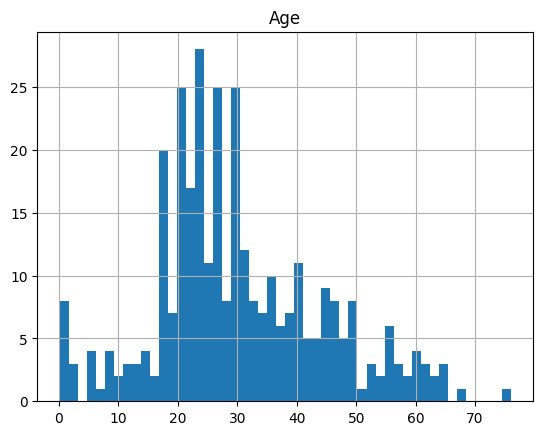

In [37]:
# Plots a histogram of the 'Age' column with 50 bins
df.hist(column='Age', bins=50)

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
#Select specific columns from the DataFrame 'df' and store them in 'X'
# Columns: 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
# 'Parch', 'Ticket', 'Fare', 'Cabin', and 'Embarked'
# Convert the data type of all selected columns to 'object' (typically used for strings or mixed types)
X = df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']].astype('object')




In [64]:
# Extract the 'Survived' column from the DataFrame 'df' and convert it to a NumPy array using .values
y = df['Survived'].values

# Display the first 5 elements of the 'y' array (i.e., the first 5 values of the 'Survived' column)
y[0:5]

array([0, 1, 0, 0, 1])

In [65]:
# Handle missing values
X['Age'].fillna(X['Age'].median())
X['Fare'].fillna(X['Fare'].median())
X['Embarked'].fillna(X['Embarked'].mode()[0])

<ipython-input-65-f4b064f649e8>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Age'].fillna(X['Age'].median())
<ipython-input-65-f4b064f649e8>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Fare'].fillna(X['Fare'].median())
<ipython-input-65-f4b064f649e8>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Embarked'].fillna(X['E

,Embarked
0,1
1,2
2,1
3,2
4,2
...,...
413,2
414,0
415,2
416,2


In [66]:
# Drop non-numeric columns ('Name', 'Ticket', 'Cabin') before scaling
X = X.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [67]:
# Convert categorical variables 'Sex' and 'Embarked' to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [68]:
#  Ensure all columns are numeric using pd.to_numeric
# errors='ignore' will keep the original value if it can't be converted,
# which we'll handle in the next step
X = X.apply(pd.to_numeric, errors='ignore')


<ipython-input-68-ff7444e9fee2>:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


In [69]:
#  Drop any remaining non-numeric columns
# This will drop any columns where to_numeric failed to convert
for column in X.select_dtypes(include=['object']).columns:
    print(f"Dropping non-numeric column: {column}")
    X = X.drop(column, axis=1)

In [70]:
# Convert the DataFrame 'X' (which contains selected columns) into a NumPy array
X = X.values


In [71]:
from sklearn.model_selection import train_test_split  # Import the function to split data into training and testing sets

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# random_state=4 ensures reproducibility (the split will be the same each time the code is run)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Print the shapes of the training and testing sets to check their dimensions
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Train set: (334, 9) (334,)
Test set: (84, 9) (84,)


In [72]:
# Apply scaling to numerical features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [73]:
# Check first 5 rows of normalized X_train
print(X_train_norm[0:5])

[[ 0.87690098 -0.73428231 -1.44192775  0.73428231  1.87800025  0.776596
  -0.4007784   2.00963262 -1.58947881]
 [-0.71594142 -0.73428231  0.90164339  0.73428231 -0.19167815 -0.53341947
  -0.4007784  -0.5188803   0.70872865]
 [-1.0460642  -0.73428231  0.90164339  0.73428231         nan -0.53341947
  -0.4007784  -0.50715556  0.70872865]
 [-0.00617745 -0.73428231  0.90164339  0.73428231 -0.40578281 -0.53341947
  -0.4007784  -0.50715556  0.70872865]
 [ 0.29093305 -0.73428231 -1.44192775  0.73428231  0.73610872  0.776596
  -0.4007784   0.29107615  0.70872865]]


In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
!pip install numpy scikit-learn

In [94]:
from sklearn.impute import SimpleImputer


In [105]:
# Create a SimpleImputer instance to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform it
X_train_imputed = imputer.fit_transform(X_train_norm)

In [103]:
# Set the number of neighbors
k = 4



In [107]:
# Train the KNN model using the imputed data (X_train_imputed)
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train_imputed, y_train) # Change: Using X_train_imputed instead of X_train_norm

KNeighborsClassifier(n_neighbors=4)

In [109]:
 # Impute missing values in X_test_norm using the SAME imputer fitted on the training data
X_test_imputed = imputer.transform(X_test_norm)

# Now make predictions using the imputed test data
y_pred = neigh.predict(X_test_imputed)

In [110]:
# Normalize the 'X_test' data using StandardScaler
# This scales the features to have a mean of 0 and a standard deviation of 1
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

# Display the first 5 rows of the normalized 'X_test' data
X_test_norm[0:5]


array([[-1.66665731,  1.18321596,  0.76968634, -1.18321596,  0.08726775,
        -0.4736252 , -0.41319694, -0.46232467, -0.61141784],
       [ 1.21044339,  1.18321596,  0.76968634, -1.18321596,  0.63532133,
        -0.4736252 , -0.41319694, -0.46912809, -1.89539531],
       [-1.14354809, -0.84515425, -1.81645976,  0.84515425,  0.15577445,
        -0.4736252 , -0.41319694, -0.10670477, -1.89539531],
       [-0.02983169,  1.18321596,  0.76968634, -1.18321596,         nan,
        -0.4736252 , -0.41319694, -0.32845376, -0.61141784],
       [ 0.94045154,  1.18321596,  0.76968634, -1.18321596, -0.80331933,
        -0.4736252 , -0.41319694, -0.46055408, -0.61141784]])

In [112]:
#Impute missing values in X_test_norm using the SAME imputer fitted on the training data
X_test_imputed = imputer.transform(X_test_norm)

# Now make predictions using the imputed test data
yhat = neigh.predict(X_test_imputed)

# Display the first 5 predicted values from 'yhat'
yhat[0:5]


array([1, 1, 0, 1, 1])

In [114]:
from sklearn import metrics  # Import the metrics module for performance evaluation

# Calculate and print the accuracy of the model on the training set
# Use X_train_imputed (the imputed training data) instead of X_train_norm
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train_imputed)))

# Calculate and print the accuracy of the model on the test set
# 'yhat' contains the predicted values for the test set
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.9970059880239521
Test set Accuracy:  0.9880952380952381


In [119]:
Ks = 10  # Set the maximum number of neighbors to test (k values) for the k-NN classifier
mean_acc = np.zeros((Ks-1))  # Initialize an array to store the mean accuracy for each k
std_acc = np.zeros((Ks-1))  # Initialize an array to store the standard deviation of accuracy for each k

# Loop over k values from 1 to Ks-1
for n in range(1, Ks):

    # Train the k-NN model with n neighbors and fit it to the normalized training data
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train_imputed, y_train)

    # Predict the labels for the normalized test data *********** CHANGED ************
    # Use X_test_imputed (or your desired test data) here instead of X_train_imputed
    yhat = neigh.predict(X_test_imputed)

    # Calculate and store the accuracy score for the current model
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    # Calculate and store the standard deviation of the accuracy
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

# Display the mean accuracy for each k value
mean_acc


array([0.98809524, 0.98809524, 0.98809524, 0.98809524, 0.98809524,
       0.98809524, 0.98809524, 0.98809524, 0.98809524])

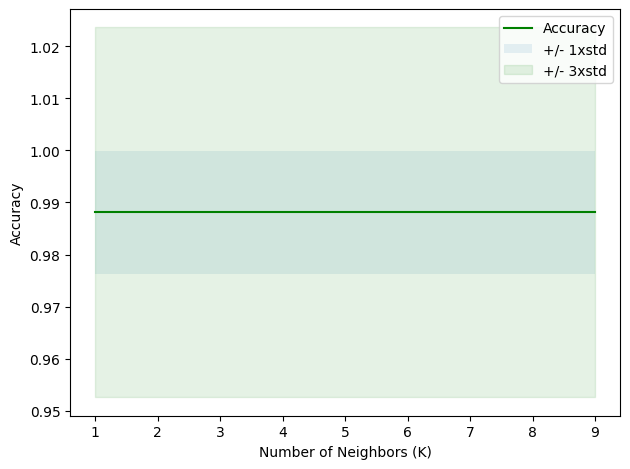

In [122]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# Plot the mean accuracy against the number of neighbors (K)
plt.plot(range(1, 10), mean_acc, 'g')  # 'g' sets the line color to green

# Fill the area between mean accuracy - 1 standard deviation and mean accuracy + 1 standard deviation
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)

# Fill the area between mean accuracy - 3 standard deviations and mean accuracy + 3 standard deviations
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")

# Add a legend to the plot
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))

# Label the y-axis
plt.ylabel('Accuracy')

# Label the x-axis
plt.xlabel('Number of Neighbors (K)')

# Adjust layout for better appearance
plt.tight_layout()

# Display the plot
plt.show()


In [121]:
# Print the maximum accuracy value and the corresponding number of neighbors (k)
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax() + 1)


The best accuracy was with 0.9880952380952381 with k= 1
